# KNN 아이리스 2진분류

### 데이터 준비

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle

In [149]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [150]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [151]:
# Id 컬럼 제거
df = iris.drop(['Id'], axis=1).copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
# 컬럼명 변경
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [153]:
# 컬럼명 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [155]:
# map() 사용하여 수치화
df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2 
})

# 한번 더 하면 dic값이 없어서, null값이 들어간다.

In [156]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### X : ~petal_with / y : species 슬라이싱

In [157]:
# 1
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [158]:
# 2
X = df.iloc[:, :-1] # 행 전부, 열 -1까지
y = df.iloc[:, -1]
X.head(), y.head()

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: species, dtype: int64)

In [159]:
# 3
X = df.drop(['species'], axis=1)
y = df['species']

In [160]:
# y = df['species'] != df[['species']]
# series / DataFrame

In [161]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 테스트 데이터 분리

In [162]:
!pip install scikit-learn --user

In [163]:
# 8:2 비율로 섞기
X, y = shuffle(X, y)

In [164]:
y.head()

133    2
140    2
131    2
141    2
79     1
Name: species, dtype: int64

In [165]:
# iloc를 사용하여 슬라이싱

X_train = X.iloc[:120, :]
X_test = X.iloc[120:, :]
y_train = y.iloc[:120]
y_test = y.iloc[120:]

In [166]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 데이터 정규화

![](https://velog.velcdn.com/images%2Fdyeudsla%2Fpost%2Fe7aed687-f282-44e8-9c82-e101c69503a2%2Fimage.png)

In [167]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
133,6.3,2.8,5.1,1.5
140,6.7,3.1,5.6,2.4
131,7.9,3.8,6.4,2.0
141,6.9,3.1,5.1,2.3
79,5.7,2.6,3.5,1.0


#### X - 평균 / 표준편차

In [147]:
# 평균
mu = X_train['sepal_length'].mean()

# 표준편차
std = X_train['sepal_length'].std()

mu, std

(5.820833333333334, 0.8274589871106242)

In [148]:
X_train['sepal_length'] = (X_train['sepal_length'] - mu)/std

C:\Users\014\AppData\Local\Temp\ipykernel_16948\994999686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sepal_length'] = (X_train['sepal_length'] - mu)/std


In [168]:
for col in X_train.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col] - mu)/std

C:\Users\014\AppData\Local\Temp\ipykernel_16948\252330780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - mu)/std


In [170]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
133,0.596431,-0.627780,0.781823,0.406643
140,1.072782,0.069753,1.057923,1.550326
131,2.501834,1.697331,1.499684,1.042023
141,1.310957,0.069753,0.781823,1.423250
79,-0.118095,-1.092802,-0.101697,-0.228737


In [174]:
# 제대로 정규화가 됐는지 체크
X_train.describe().T

#mean은 0, std는 1로 잘 변환된것을 확인.

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,3.996803e-16,1.0,-1.785323,-0.832621,-0.118095,0.715518,2.501834
sepal_width,120.0,3.404684e-16,1.0,-2.487869,-0.627780,-0.162758,0.592903,3.092398
petal_length,120.0,-2.516506e-16,1.0,-1.482197,-1.206097,0.340063,0.781823,1.775784
petal_width,120.0,1.184238e-16,1.0,-1.372420,-1.150037,0.152491,0.787871,1.677402


In [178]:
# 현재 파일타입은 DataFrame.

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [179]:
# 모델에 넣기위해 nparray 형식으로 전환

X_train = X_train.values
y_train = y_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [180]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 테스트 데이터

### 데이터 전처리 함수

In [249]:
def get_iris():
    # csv 파일 읽기
    iris = pd.read_csv('iris.csv')
    # 'id' index제거
    df = iris.drop(['Id'], axis=1).copy()
    # 컬럼명 lower
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    
    # Iris 품종 정규화
    df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2 
    })
    
    X = df.iloc[:, :-1] # 행 전부, 열 -1까지
    y = df.iloc[:, -1]
    
    X, y = shuffle(X, y)
    
    X_train = X.iloc[:120, :]
    X_test = X.iloc[120:, :]
    y_train = y.iloc[:120]
    y_test = y.iloc[120:]
    
    return X_train, X_test, y_train, y_test

In [250]:
X_train, X_test, y_train, y_test = get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 이진데이터 데이터 준비

In [197]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [201]:
df.iloc[:100, :]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [253]:
def get_iris_2():
    # csv 파일 읽기
    iris = pd.read_csv('iris.csv')
    # 'id' index제거
    df = iris.drop(['Id'], axis=1).copy()
    # 컬럼명 lower
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    
    # 0,1 슬라이스
    df = df.iloc[:100, :]
    
    # Iris 품종 정규화
    df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
    })
    
    X = df.iloc[:, :-1] # 행 전부, 열 -1까지
    y = df.iloc[:, -1]
    
    X, y = shuffle(X, y)
    
    X_train = X.iloc[:80, :]
    X_test = X.iloc[80:, :]
    y_train = y.iloc[:80]
    y_test = y.iloc[80:]
    
    mu = []
    std = []

    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std
    
    return X_train, X_test, y_train, y_test

In [254]:
X_train, X_test, y_train, y_test = get_iris_2()

C:\Users\014\AppData\Local\Temp\ipykernel_16948\4117999673.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - mu)/std
C:\Users\014\AppData\Local\Temp\ipykernel_16948\4117999673.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col] - mu)/std


In [255]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [256]:
print(type(X_train), type(X_test))
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [257]:
X_test.shape

(20, 4)

### solution

In [217]:
# 2진 데이터

df = df.loc[df['species'] != 'Iris-virginica']

df['species'] = df['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1
    })

In [262]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [267]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0]


#### 평가

In [268]:
clf.score(X_train, y_train)

1.0

In [269]:
clf.score(X_test, y_test)

1.0

In [270]:
# 예측
y_pred = clf.predict(X_test)

In [261]:
# y_pred, y_test 정확도를 계산

In [271]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

#### 정확도 계산식

In [272]:
(y_pred == y_test).sum() / len(y_test)

1.0

In [282]:
# 평가 지표 : metrics
# 알고리즘의 성능평가
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print('accuracy : ', acc)
    print('precision : ', pre)
    print('recall : ', rec)

In [280]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)

accuracy :  1.0
precision :  1.0
recall :  1.0


In [283]:
print_score(y_test, y_pred)

accuracy :  1.0
precision :  1.0
recall :  1.0


### 혼동행렬 (Confusion Matrix)

In [293]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

# TT TF
# FF FT

array([[ 8,  0],
       [ 0, 12]], dtype=int64)

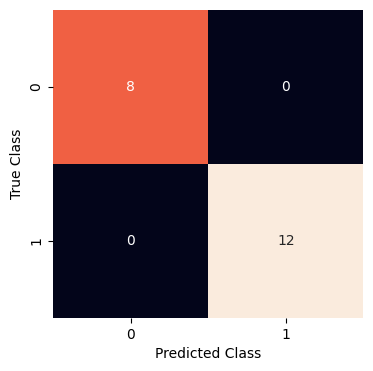

In [292]:
plt.figure(figsize=(4,4))
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()